Shubham Kotal

# Objective - To predict Activity of person by different given measuring features.

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# setting directory
os.chdir("D:\\New_techolutions")

In [3]:
#reading csv files
train=pd.read_csv("train.csv",na_values=["?",","])
test=pd.read_csv("test.csv",na_values=["?",","])

In [4]:
#check dimensions
train.shape

(7352, 563)

In [5]:
test.shape

(2947, 562)

In [6]:
#view
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586
tBodyAcc-mean()-Y,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758
tBodyAcc-std()-Z,-0.913526,-0.960322,-0.978944,-0.990675,-0.990482,-0.99542,-0.983118,-0.981585,-0.983672,-0.986244
tBodyAcc-mad()-X,-0.995112,-0.998807,-0.99652,-0.997099,-0.998321,-0.997627,-0.997003,-0.996485,-0.997596,-0.995405
tBodyAcc-mad()-Y,-0.983185,-0.974914,-0.963668,-0.98275,-0.979672,-0.990218,-0.966097,-0.966313,-0.957236,-0.973663
tBodyAcc-mad()-Z,-0.923527,-0.957686,-0.977469,-0.989302,-0.990441,-0.995549,-0.983116,-0.982982,-0.984379,-0.985642
tBodyAcc-max()-X,-0.934724,-0.943068,-0.938692,-0.938692,-0.942469,-0.942469,-0.940987,-0.940987,-0.940598,-0.940028


In [7]:
test.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2


In [8]:
#type of features
train.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
tBodyAcc-std()-Z                        float64
tBodyAcc-mad()-X                        float64
tBodyAcc-mad()-Y                        float64
tBodyAcc-mad()-Z                        float64
tBodyAcc-max()-X                        float64
tBodyAcc-max()-Y                        float64
tBodyAcc-max()-Z                        float64
tBodyAcc-min()-X                        float64
tBodyAcc-min()-Y                        float64
tBodyAcc-min()-Z                        float64
tBodyAcc-sma()                          float64
tBodyAcc-energy()-X                     float64
tBodyAcc-energy()-Y                     float64
tBodyAcc-energy()-Z                     float64
tBodyAcc-iqr()-X                        float64
tBodyAcc-iqr()-Y                        

In [9]:
test.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
tBodyAcc-std()-Z                        float64
tBodyAcc-mad()-X                        float64
tBodyAcc-mad()-Y                        float64
tBodyAcc-mad()-Z                        float64
tBodyAcc-max()-X                        float64
tBodyAcc-max()-Y                        float64
tBodyAcc-max()-Z                        float64
tBodyAcc-min()-X                        float64
tBodyAcc-min()-Y                        float64
tBodyAcc-min()-Z                        float64
tBodyAcc-sma()                          float64
tBodyAcc-energy()-X                     float64
tBodyAcc-energy()-Y                     float64
tBodyAcc-energy()-Z                     float64
tBodyAcc-iqr()-X                        float64
tBodyAcc-iqr()-Y                        

In [10]:
#checking missing values
train.isnull().sum()


tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
tBodyAcc-std()-Z                        0
tBodyAcc-mad()-X                        0
tBodyAcc-mad()-Y                        0
tBodyAcc-mad()-Z                        0
tBodyAcc-max()-X                        0
tBodyAcc-max()-Y                        0
tBodyAcc-max()-Z                        0
tBodyAcc-min()-X                        0
tBodyAcc-min()-Y                        0
tBodyAcc-min()-Z                        0
tBodyAcc-sma()                          0
tBodyAcc-energy()-X                     0
tBodyAcc-energy()-Y                     0
tBodyAcc-energy()-Z                     0
tBodyAcc-iqr()-X                        0
tBodyAcc-iqr()-Y                        0
tBodyAcc-iqr()-Z                        0
tBodyAcc-entropy()-X                    0
tBodyAcc-entropy()-Y              

In [11]:
test.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
tBodyAcc-std()-Z                        0
tBodyAcc-mad()-X                        0
tBodyAcc-mad()-Y                        0
tBodyAcc-mad()-Z                        0
tBodyAcc-max()-X                        0
tBodyAcc-max()-Y                        0
tBodyAcc-max()-Z                        0
tBodyAcc-min()-X                        0
tBodyAcc-min()-Y                        0
tBodyAcc-min()-Z                        0
tBodyAcc-sma()                          0
tBodyAcc-energy()-X                     0
tBodyAcc-energy()-Y                     0
tBodyAcc-energy()-Z                     0
tBodyAcc-iqr()-X                        0
tBodyAcc-iqr()-Y                        0
tBodyAcc-iqr()-Z                        0
tBodyAcc-entropy()-X                    0
tBodyAcc-entropy()-Y              

In [12]:
#changing type of feature
train['Activity']=train['Activity'].astype('category')

In [13]:
#checking counts of target, to check weather its balanced or inbalanced
train.Activity.value_counts()


LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

# visualization telling about counts of levels.

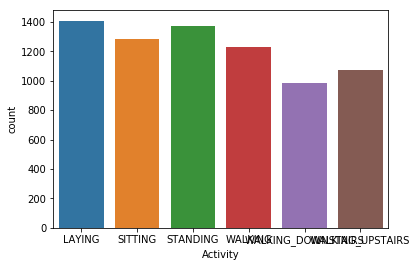

In [75]:
import seaborn as sns
sns.countplot(x='Activity',data=train)

In [14]:
#label encoding of target to perform svc

from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()
train['New_activity'] = T.fit_transform(train.Activity)

In [15]:
train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,New_activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,2


In [16]:
#splitting data
X, y = train, train.New_activity

In [17]:
#drop target from data

X=X.drop('Activity',axis=1)
X=X.drop('New_activity',axis=1)

In [19]:
from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[0,1,2,3,4,5])
n_classes = 6

# Support vector machine for classification

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [23]:
newtrain = clf.predict(X_train)
newtest = clf.predict(X_test)

In [25]:
#checking accuracy

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

print(accuracy_score(y_train,newtrain))
print(accuracy_score(y_test,newtest))

0.988020304568528
0.9756901524515863


# Our focus is on precision and recall
# Hence Taking F1 score as its an Weighted average of recall and precision

In [27]:
#Report 

from sklearn.metrics import classification_report


print(classification_report(y_train,clf.predict(X_train)))
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       925
           1       0.97      0.99      0.98       842
           2       1.00      0.94      0.97       923
           3       1.00      1.00      1.00       832
           4       1.00      1.00      1.00       672
           5       1.00      1.00      1.00       731

   micro avg       0.99      0.99      0.99      4925
   macro avg       0.99      0.99      0.99      4925
weighted avg       0.99      0.99      0.99      4925
 samples avg       0.99      0.99      0.99      4925

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       482
           1       0.94      0.98      0.96       444
           2       0.99      0.91      0.95       451
           3       1.00      1.00      1.00       394
           4       1.00      0.99      1.00       314
           5       0.99      1.00      0.99       342

   micro avg       0.98

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


# Compute ROC curve and ROC area for each class


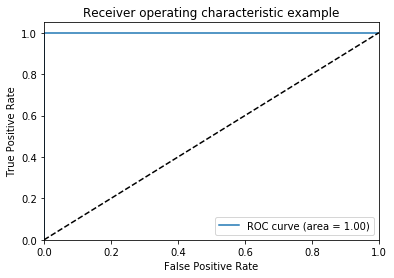

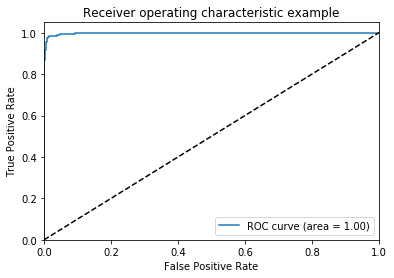

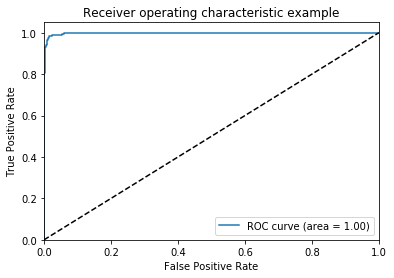

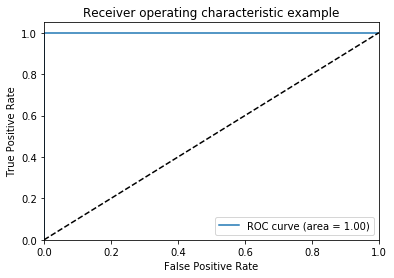

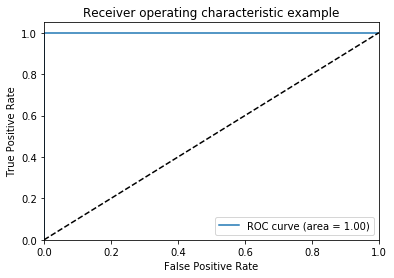

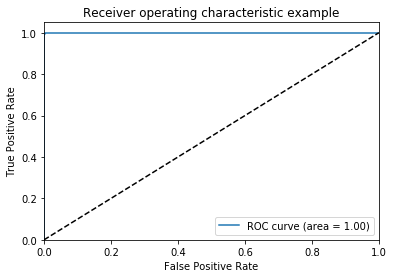

In [29]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [37]:
#drop created target made by label encoding
train=train.drop('New_activity', axis=1)


In [38]:
# Divide into train and test
train_target=train["Activity"]
train1=train.drop('Activity', axis=1)
train2,val2,train_target2,val_target2 = train_test_split(train1, train_target, test_size=0.3)  

# Logistic regression Model

In [39]:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01,max_iter=100)
logreg.fit(train2, train_target2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
train_predl = logreg.predict(train2)
print(accuracy_score(train_target2,train_predl))
val_predl= logreg.predict(val2)
print(accuracy_score(val_target2,val_predl))

0.9391760590750097
0.9301903898458749


In [41]:
print(classification_report(train_target2,logreg.predict(train2)))
print(classification_report(val_target2,logreg.predict(val2)))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       977
           SITTING       0.90      0.83      0.86       901
          STANDING       0.86      0.92      0.89       954
           WALKING       0.97      0.98      0.97       850
WALKING_DOWNSTAIRS       0.98      0.96      0.97       696
  WALKING_UPSTAIRS       0.95      0.97      0.96       768

         micro avg       0.94      0.94      0.94      5146
         macro avg       0.94      0.94      0.94      5146
      weighted avg       0.94      0.94      0.94      5146

                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       430
           SITTING       0.87      0.82      0.84       385
          STANDING       0.86      0.89      0.87       420
           WALKING       0.97      0.97      0.97       376
WALKING_DOWNSTAIRS       0.98      0.95      0.96       290
  WALKING_UPSTAIRS       0.94      0

# using smote to overcome class imbalance


In [42]:
#using smote to overcome class imbalance

from imblearn.over_sampling import SMOTE 
sm=SMOTE(random_state=42)
X_train_sm, y_train_sm =sm.fit_sample(train2,train_target2)


# LOG model after smotting

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01,max_iter=100)
log.fit(X_train_sm, y_train_sm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
train_predlog = log.predict(train2)
print(accuracy_score(train_target2,train_predlog))
val_predlog= log.predict(val2)
print(accuracy_score(val_target2,val_predlog))

0.9430625728721337
0.9324569356300997


In [46]:
print(classification_report(train_target2,log.predict(train2)))
print(classification_report(val_target2,log.predict(val2)))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       977
           SITTING       0.90      0.84      0.87       901
          STANDING       0.87      0.91      0.89       954
           WALKING       0.98      0.97      0.98       850
WALKING_DOWNSTAIRS       0.98      0.98      0.98       696
  WALKING_UPSTAIRS       0.95      0.97      0.96       768

         micro avg       0.94      0.94      0.94      5146
         macro avg       0.95      0.94      0.94      5146
      weighted avg       0.94      0.94      0.94      5146

                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       430
           SITTING       0.86      0.82      0.84       385
          STANDING       0.87      0.88      0.87       420
           WALKING       0.99      0.96      0.97       376
WALKING_DOWNSTAIRS       0.97      0.98      0.98       290
  WALKING_UPSTAIRS       0.94      0

# using Regularization Technique
# Ridge

In [50]:
from sklearn import linear_model
Ridge = linear_model.Ridge(alpha=0)
Ridge.fit(X_train, y_train)


Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
print('Train Accuracy =',Ridge.score(X_train, y_train))
print('Test Accuracy =',Ridge.score(X_test, y_test))

Train Accuracy = 0.8919719637211947
Test Accuracy = 0.8591314979474859


# Random Forest Model

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
model1 = RandomForestClassifier(n_estimators=500,max_depth=2)
model1.fit(X=train2, y=train_target2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

train_pred1 = model1.predict(train2)
print(accuracy_score(train_target2,train_pred1))
val_pred1= model1.predict(val2)
print(accuracy_score(val_target2,val_pred1))

0.8165565487757481
0.799184043517679


In [55]:
from sklearn.metrics import classification_report
print(classification_report(train_target2,model1.predict(train2)))
print(classification_report(val_target2,model1.predict(val2)))

                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       977
           SITTING       0.90      0.41      0.56       901
          STANDING       0.64      0.96      0.77       954
           WALKING       0.75      0.96      0.85       850
WALKING_DOWNSTAIRS       0.87      0.85      0.86       696
  WALKING_UPSTAIRS       0.96      0.69      0.80       768

         micro avg       0.82      0.82      0.82      5146
         macro avg       0.85      0.81      0.81      5146
      weighted avg       0.85      0.82      0.81      5146

                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       430
           SITTING       0.87      0.36      0.51       385
          STANDING       0.63      0.95      0.76       420
           WALKING       0.73      0.97      0.83       376
WALKING_DOWNSTAIRS       0.88      0.81      0.84       290
  WALKING_UPSTAIRS       0.96      0

# Features importance plot


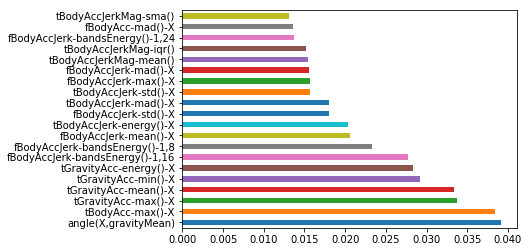

In [58]:
# Features importance plot

feat_importances = pd.Series(model1.feature_importances_, index=train2.columns)
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.nlargest(20).plot(kind='barh')

# Adaboost Model

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1,criterion='gini'),
    n_estimators=100,
    learning_rate=1)


Adaboost_model.fit(train2, train_target2)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=100, random_state=None)

In [61]:
train_pred6 = Adaboost_model.predict(train2)
print(accuracy_score(train_target2,train_pred6))
val_pred6= Adaboost_model.predict(val2)
print(accuracy_score(val_target2,val_pred6))

0.5404197434900894
0.5557570262919311


# Dimension Reductional Technique
# Using PCA

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(train2)
principaltrain = pd.DataFrame(data = principalComponents
             , columns = range(0,100))

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(val2)
principalval = pd.DataFrame(data = principalComponents
             , columns = range(0,100))

# LOG model with pca

In [69]:

logpca = LogisticRegression(C=0.01,max_iter=100)
logpca.fit(principaltrain, train_target2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
train_predpca = logpca.predict(principaltrain)
print(accuracy_score(train_target2,train_predpca))
val_predpca= logpca.predict(principalval)
print(accuracy_score(val_target2,val_predpca))

0.9321803342401865
0.6767905711695377


In [72]:
print(classification_report(train_target2,logpca.predict(principaltrain)))
print(classification_report(val_target2,logpca.predict(principalval)))

                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       977
           SITTING       0.90      0.80      0.85       901
          STANDING       0.84      0.91      0.88       954
           WALKING       0.97      0.97      0.97       850
WALKING_DOWNSTAIRS       0.97      0.96      0.97       696
  WALKING_UPSTAIRS       0.94      0.96      0.95       768

         micro avg       0.93      0.93      0.93      5146
         macro avg       0.93      0.93      0.93      5146
      weighted avg       0.93      0.93      0.93      5146

                    precision    recall  f1-score   support

            LAYING       0.93      0.99      0.96       430
           SITTING       0.67      0.54      0.60       385
          STANDING       0.71      0.76      0.74       420
           WALKING       0.52      0.54      0.53       376
WALKING_DOWNSTAIRS       0.31      0.27      0.29       290
  WALKING_UPSTAIRS       0.75      0

# Summary -
                 The ML classification Models were created which successfully predicted Activity of person by different given measuring features.
The Machine Learnig models used where SVC, Logistic, Random forest, Ada-Boost.
Got Best predictions from model svc with train & test almost 97.5%, and logistic regression model with train & test almost 93% .
 
Using Ridge accuracy where imporved, while pca was not usefully in this scenario.
 
The features where highly correlated and also having multicollinearity so Ensembler techniques couldn't perfrom well.
 The features where of same unit, giving almost same information. Hence Standardization was not required.
 
Data was sparsh, Hence SVC model Gave best prediction.
 
Features where telling about same info and even size of data was huge hence co-relation, vif check can not be perform.